In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import heapq

In [15]:
df = pd.read_csv('/content/cluster_data1.csv')
df.shape

df_test = pd.read_csv('/content/cluster_data2.csv')
df.shape

(150, 4)

In [16]:
missing_values = df.isnull().sum()
print(missing_values)
print(df.dtypes)

X1    0
X2    0
X3    0
X4    0
dtype: int64
X1    float64
X2    float64
X3    float64
X4    float64
dtype: object


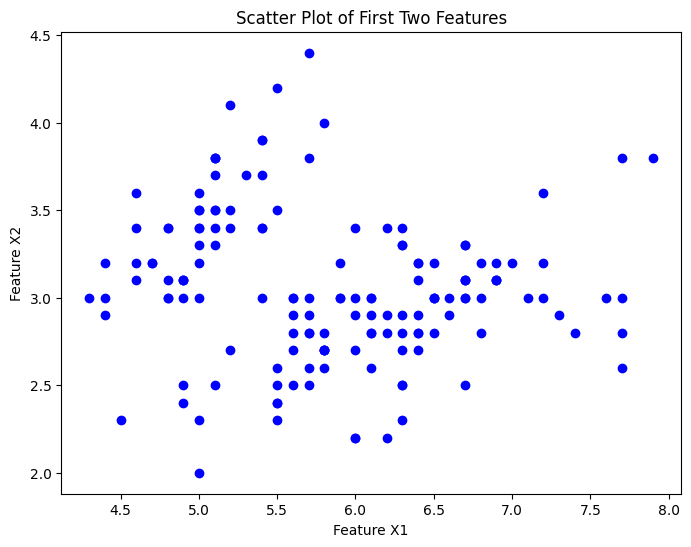

In [62]:
#visualizing the first two features

plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', color='blue')

plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Scatter Plot of First Two Features')
plt.show()

In [25]:
#testing euclidean distance
sum((df.iloc[0].values - df.iloc[1].values) ** 2)

0.5399999999999999

In [19]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

euclidean_distance(df.iloc[0].values,df.iloc[1].values)

0.7348469228349533

kmeans time taken:  11.797283172607422


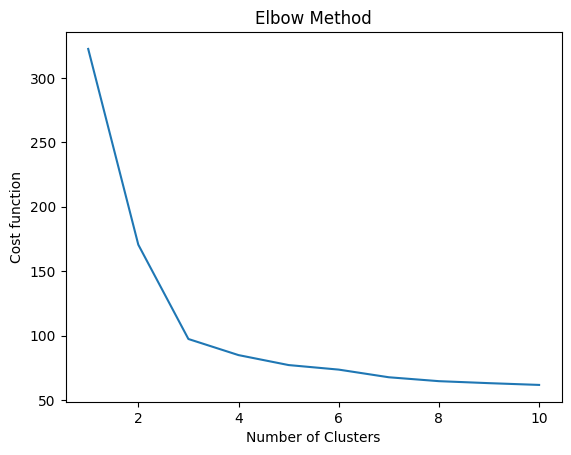

In [72]:

class KMeans:

    def __init__(self, in_clusters=2, seed=23, kmeans_plus_plus = False):
        self.in_clusters = in_clusters
        self.seed = seed
        self.kmeans_plus_plus = kmeans_plus_plus
        np.random.seed(seed)


    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2, axis = 1))

    def initialize_clusters(self, X):
        centroids_ids = np.random.choice(X.shape[0], size=self.in_clusters, replace=False)
        centroids = []
        for i in centroids_ids:
          centroids.append(X.iloc[i].values)
        return centroids

    def intialize_clusters_k_plus_plus(self, X):

        centroids = []
        #randomly choosing the first centroid
        centroid_id = np.random.choice(X.shape[0])
        centroids.append(X.iloc[centroid_id].values)
        heap = []
        for _ in range(1, self.in_clusters):
            dist = [0]*X.shape[0]
            for i, x in enumerate(X.values):
                for c in centroids:
                    dist[i] += self.euclidean_distance(x,c)
            new_centroid = X.iloc[np.argmax(dist)].values
            centroids.append(new_centroid)
        return centroids


    def calc_distances(self, X, centroids):
        labels = np.zeros(len(X), dtype=int)
        for i, x in X.iterrows():
            min_dist = float('inf')
            for j, centroid in enumerate(centroids):
                dist = np.sqrt(np.sum((x - centroid)**2))
                if dist < min_dist:
                    min_dist = dist
                    labels[i] = j
        return labels

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.in_clusters, X.shape[1]))
        for k in range(self.in_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
        return centroids

    def fit(self, X, max_iters=100):
        centroids = self.initialize_clusters(X)
        for i in range(max_iters):
            labels = self.calc_distances(X, centroids)
            new_centroids = self.update_centroids(X, labels)
            #if i == 99:

              #print("reached max iteration")
            #else:

              #print("num of iters ",i)
              #print(centroids)
              #print(new_centroids)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        return centroids, labels


    def elbow_method(self, X, max_clusters=10):
        labels_all = {}
        cost_function_values = []
        for k in range(1, max_clusters + 1):
            if self.kmeans_plus_plus:
              kmeans = KMeans(in_clusters=k, kmeans_plus_plus=True)
              #if k == 10: print("done using kmeans++")
            else:
              kmeans = KMeans(in_clusters=k)

            centroids, labels = kmeans.fit(X)
            labels_all[k] = labels
            cost_function = 0
            for i, x in X.iterrows():
                cost_function += np.sqrt(np.sum((x - centroids[labels[i]]) ** 2))
            cost_function_values.append(cost_function)
        return cost_function_values, labels_all

start_time = time.time()
kmeans = KMeans()
cost_function_values , labels_all = kmeans.elbow_method(df)
end_time = time.time()
print("kmeans time taken: ", end_time - start_time)
plt.plot(range(1, len(cost_function_values) + 1), cost_function_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost function')
plt.title('Elbow Method')
plt.show()

#print(centroids)
#print(labels)

#print(df.shape)


kmeans++ time taken:  11.634968280792236


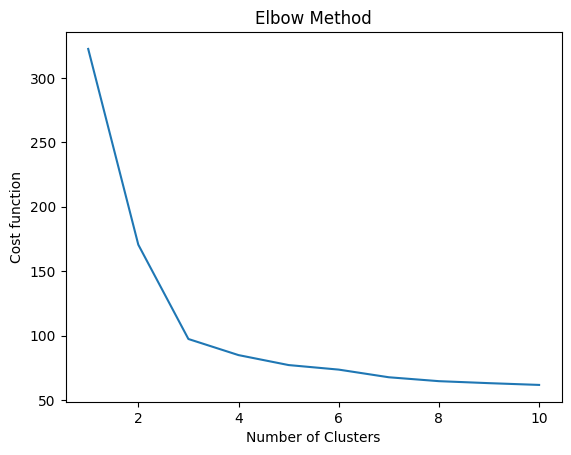

In [71]:
#kmeans++
start_time = time.time()
kmeans_kpp = KMeans(kmeans_plus_plus= True)
cost_function_values_kpp, labels_all_kpp = kmeans_kpp.elbow_method(df)
end_time = time.time()
print("kmeans++ time taken: ", end_time - start_time)
plt.plot(range(1, len(cost_function_values_kpp) + 1), cost_function_values_kpp)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost function')
plt.title('Elbow Method')
plt.show()

In [30]:
#knn

import math
from collections import Counter

import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def manhattan_distance(x1, x2):
    return np.sqrt(np.sum(math.abs(x1 - x2)))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict(self, X):
        print("X_train type:", type(self.X_train))
        print("X_train shape:", self.X_train.shape)
        print("x type:", type(X))
        print("x shape:", X.shape)
        predictions = [self._predict(x) for x in X.values]
        return predictions

    def _predict(self, x):

        # compute the distance
        # distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        # get the closest k neighbors
        k_ind = np.argsort(distances)[: self.k]
        k_labels = [self.y_train[i] for i in k_ind]

        # get votes
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

In [44]:
labels_all[3]

array([2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0,
       0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2,
       1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0,
       1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1,
       2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1])

In [49]:
import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df['labels'] = labels_all[3]
y = df['labels']
X = df.drop(columns=['labels'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=26
)
#print(X_test.dtypes)
#print(y_test.dtype)
# custom model time
all_accs = []
for n in range(1,11):
    start_time = time.time()
    clf = KNN(k=n)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = np.sum(predictions == y_test) / len(y_test)
    end_time = time.time()
    print("knn accuracy: ", acc, "with time taken: ", end_time - start_time)
    all_accs.append(acc)

# sklearn

start_time = time.time()
clf1 = KNeighborsClassifier(n_neighbors=5)
# custom model time
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
sk_acc = np.sum(predictions == y_test) / len(y_test)
end_time = time.time()
# sklearn model time
print("sklearn knn accuracy", sk_acc, "with time taken: ", end_time - start_time)


X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type: <class 'pandas.core.frame.DataFrame'>
x shape: (30, 4)
knn accuracy:  1.0 with time taken:  0.007946968078613281
X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type: <class 'pandas.core.frame.DataFrame'>
x shape: (30, 4)
knn accuracy:  1.0 with time taken:  0.00652313232421875
X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type: <class 'pandas.core.frame.DataFrame'>
x shape: (30, 4)
knn accuracy:  1.0 with time taken:  0.0031337738037109375
X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type: <class 'pandas.core.frame.DataFrame'>
x shape: (30, 4)
knn accuracy:  1.0 with time taken:  0.015740633010864258
X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type: <class 'pandas.core.frame.DataFrame'>
x shape: (30, 4)
knn accuracy:  0.9666666666666667 with time taken:  0.0019969940185546875
X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type:

[1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


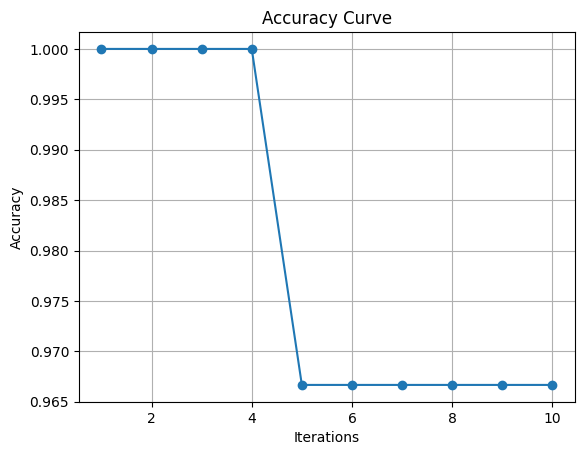

In [48]:
iterations = range(1, 11)  # assuming 10 iterations
print(all_accs)
# Plot the accuracy curve
plt.plot(iterations, all_accs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.grid(True)
plt.show()

In [50]:
#on cluster data 2
print(df_test.shape)

start_time = time.time()
clf1 = KNeighborsClassifier(n_neighbors=5)

clf1.fit(X_train, y_train)
predictions = clf1.predict(df_test)
print(predictions)
end_time = time.time()

(15, 4)
[1 1 0 0 2 0 1 2 1 2 0 2 1 2 0]


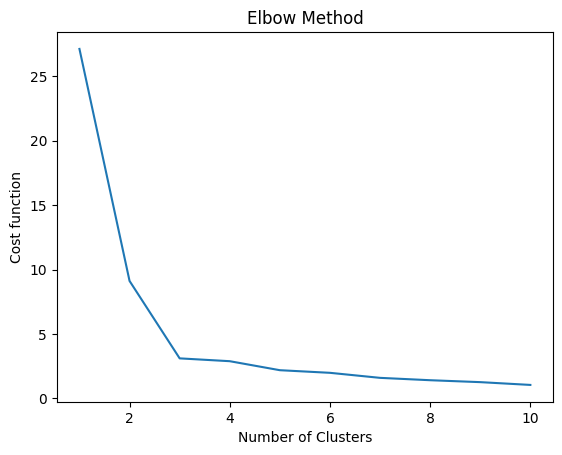

In [63]:
#extra
#using kmeans to label the data of cluster 2 and then using knn to predict which is trained on data1

kmeans = KMeans()
cost_function_values , labels_all = kmeans.elbow_method(df_test)

plt.plot(range(1, len(cost_function_values) + 1), cost_function_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost function')
plt.title('Elbow Method')
plt.show()

In [ ]:
print(df_test)

In [ ]:
#the optimal k value is 3 too so we use the labels of when k = 3
#labels[3]
df_test['labels'] = labels_all[3]
y = df_test['labels']
X = df_test.drop(columns=['labels'])
print(y)
predictions = clf1.predict(X)
print(predictions)
print("acc: ",np.sum(predictions == y) / len(y))


In [ ]:
#we get accuracy zero all the clusters got assigned randomly so the mapping is 1 = 2, 0 = 1, 2= 0
#and we get hundred percent accuracy

#summary:

I first loaded the cluster_data1 and loaded it into a dataframe and have done basic missing values test and then visualized it using a scatterplot of two variables.

**question 1:**

I then started building a kmeans model which is just assigning clusters randomly and then converging until the max number of iterations are reached which is 100 or the there is no movement in the new centroids that are formed.
We calc distance between points and initial clusters, and then assign new centroid by taking the mean of the all the points in that cluster. I run the model from initial clusters 1 to 10. to find out the optimal k number of clusters.

I repeat the same class functions of kmeans to kmeans++
except the centroid initialization, in kmeans. we just find random. points in the data and assign them as the new centroids. and improve it with taking the mean of the assignment.

In kmeans++, i take first centroid randomly and then take the farthest point in the datapoints and then keep doing that for the 2nd 3rd centroids already declared, I calculate the euclidean distance of each point from the centroid and then find the argmax of the distances calculated. there are more efficient ways like using the probilitistic determination of which point is fartest in the most efficient code but the question was to implement it from scratch and not write the most efficient code.

I plot both kmeans and kmeans++ from 1st assginment of clusters to 10 and calculate the costfunction. I use the labels predicted of cluster 3 as it is the optimal as shown in both graphs and then add them to the dataframe, to do the knn.

**quesion 2:**

knn i implement from scratch and also use the sklearn to showcase how mine is better. i use the euclidean distance to calculate the distances and take the majority vote to predict the label.
I use the train test split 0.8,0.2. train the model on data1 and then print out the results. the accuracy of the model drops as we increase the number of nearest neighbors. i also use the model to predict labels of data2. and train test data2 with kmeans and knn just as extra in case that is what is asked.